In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Loading cleaned datasets

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_benin_data.csv to cleaned_benin_data.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_sierra_data.csv to cleaned_sierra_data.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_togo_data.csv to cleaned_togo_data.csv


In [7]:
def load_cleaned_data(file_paths):
    """
    Loads cleaned data from a list of file paths.

    Args:
        file_paths (list): A list of file paths (strings) to the cleaned data CSV files.

    Returns:
        dict: A dictionary where keys are country names (derived from filenames)
              and values are pandas DataFrames loaded from the corresponding files.
    """
    loaded_data = {}
    for file_path in file_paths:
        try:
            # Extract country name from the filename (e.g., 'cleaned_benin_data.csv' -> 'Benin')
            country_name = file_path.replace('cleaned_', '').replace('_data.csv', '').capitalize()
            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(file_path)
            loaded_data[country_name] = df
            print(f"Successfully loaded {file_path} as {country_name}")
        except FileNotFoundError:
            print(f"Error: File not found at {file_path}")
        except Exception as e:
            print(f"An error occurred while loading {file_path}: {e}")
    return loaded_data

# Original code to load the datasets
file_paths = [
    'cleaned_benin_data.csv',
    'cleaned_sierra_data.csv',
    'cleaned_togo_data.csv'
]

# Load the datasets using the defined function
cleaned_data = load_cleaned_data(file_paths)

# Access individual DataFrames
# Note: The keys in cleaned_data will now be 'Benin', 'Sierra', 'Togo'
benin_data = cleaned_data['Benin']
sierra_leone_data = cleaned_data['Sierra']
togo_data = cleaned_data['Togo']

Successfully loaded cleaned_benin_data.csv as Benin
Successfully loaded cleaned_sierra_data.csv as Sierra
Successfully loaded cleaned_togo_data.csv as Togo


#Data Preparation

In [11]:
# Added a country identifier
benin_data['Country'] = 'Benin'
sierra_leone_data['Country'] = 'Sierra Leone'
togo_data['Country'] = 'Togo'

# Combined datasets
combined_data = pd.concat([benin_data[['GHI', 'DNI', 'DHI', 'Country']],
                            sierra_leone_data[['GHI', 'DNI', 'DHI', 'Country']],
                            togo_data[['GHI', 'DNI', 'DHI', 'Country']]])

#Metric comparison using box plot

<ipython-input-12-453c6faa5a51>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Country', y='GHI', palette='Set2')
<ipython-input-12-453c6faa5a51>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Country', y='DNI', palette='Set2')
<ipython-input-12-453c6faa5a51>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Country', y='DHI', palette='Set2')


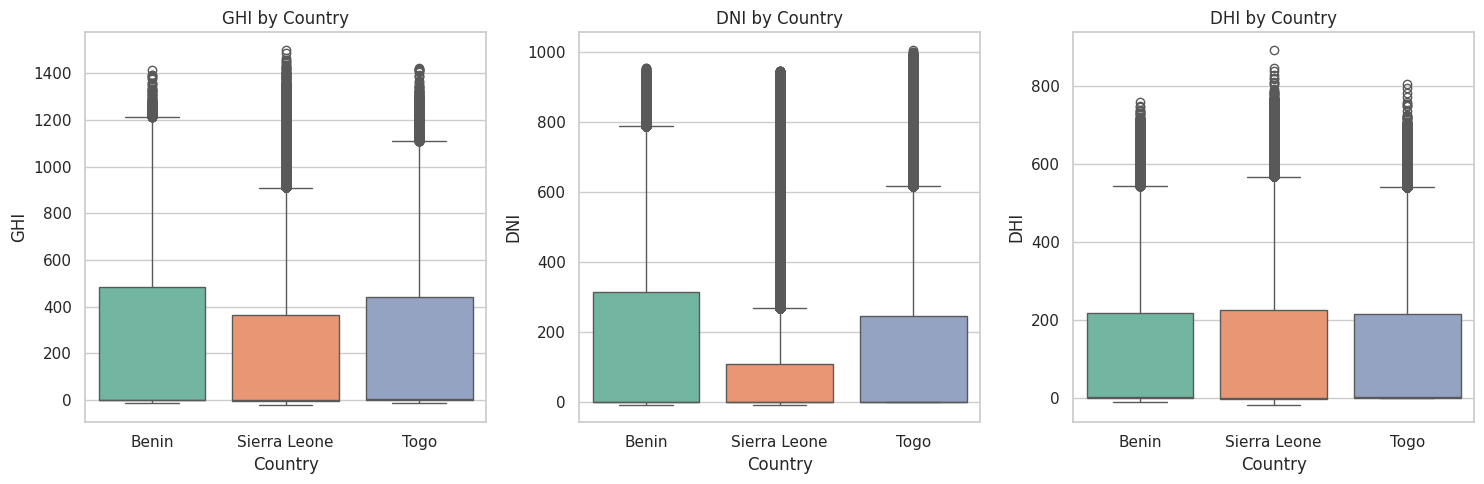

In [12]:
def plot_solar_boxplots(data):
    """
    Generate boxplots for GHI, DNI, and DHI by country.

    Parameters:
    data (DataFrame): A pandas DataFrame containing 'Country', 'GHI', 'DNI', and 'DHI' columns.
    """
    sns.set(style='whitegrid')

    # Created a figure with three subplots
    plt.figure(figsize=(15, 5))

    # Boxplot for GHI
    plt.subplot(1, 3, 1)
    sns.boxplot(data=data, x='Country', y='GHI', palette='Set2')
    plt.title('GHI by Country')

    # Boxplot for DNI
    plt.subplot(1, 3, 2)
    sns.boxplot(data=data, x='Country', y='DNI', palette='Set2')
    plt.title('DNI by Country')

    # Boxplot for DHI
    plt.subplot(1, 3, 3)
    sns.boxplot(data=data, x='Country', y='DHI', palette='Set2')
    plt.title('DHI by Country')

    plt.tight_layout()
    plt.show()

    #combined_data is already defined and contains the necessary columns.
    plot_solar_boxplots(combined_data)

#Summary Table comparing mean, median, and standard deviation of GHI, DNI, DHI across countries.


In [18]:
# Summary statistics

def calculate_summary_statistics(data):
    """
    Calculate summary statistics for GHI, DNI, and DHI by country.

    Parameters:
    data (DataFrame): A pandas DataFrame containing 'Country', 'GHI', 'DNI', and 'DHI' columns.

    Returns:
    DataFrame: A DataFrame containing summary statistics for each country.
    """
    summary_table = data.groupby('Country').agg(
        mean_GHI=('GHI', 'mean'),
        median_GHI=('GHI', 'median'),
        std_GHI=('GHI', 'std'),
        mean_DNI=('DNI', 'mean'),
        median_DNI=('DNI', 'median'),
        std_DNI=('DNI', 'std'),
        mean_DHI=('DHI', 'mean'),
        median_DHI=('DHI', 'median'),
        std_DHI=('DHI', 'std')
    ).reset_index()

    return summary_table


summary_statistics = calculate_summary_statistics(combined_data)

# Print the summary statistics
print(summary_statistics)

        Country    mean_GHI  median_GHI     std_GHI    mean_DNI  median_DNI  \
0         Benin  240.559452         1.8  331.131327  167.187516        -0.1   
1  Sierra Leone  201.957515         0.3  298.495150  116.376337        -0.1   
2          Togo  230.555040         2.1  322.532347  151.258469         0.0   

      std_DNI    mean_DHI  median_DHI     std_DHI  
0  261.710501  115.358961         1.6  158.691074  
1  218.652659  113.720571        -0.1  158.946032  
2  250.956962  116.444352         2.5  156.520714  


#Statistical Testing using One-Way ANOVA (or Kruskal-Wallis Test)



In [16]:
from scipy.stats import f_oneway

def perform_anova(data, countries, variable):
    """
    Perform ANOVA on the specified variable grouped by countries.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the data.
    countries (list): A list of country names to include in the ANOVA.
    variable (str): The variable to analyze (e.g., 'GHI').

    Returns:
    tuple: F-statistic and p-value from the ANOVA test.
    """
    # Extract data for the specified countries and variable
    groups = [data[data['Country'] == country][variable] for country in countries]

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)

    return f_statistic, p_value

    # Define the countries and variable for analysis
    countries = ['Benin', 'Sierra Leone', 'Togo']
    variable = 'GHI'

# Perform ANOVA
f_statistic, p_value = perform_anova(combined_data, countries, variable)

# Print the ANOVA results
print(f'ANOVA p-value: {p_value}')

ANOVA p-value: 0.0


#Key observations

#Visual Summary: Bar Chart Ranking Countries by Average GHI

<ipython-input-20-f1aa33208629>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Country', y='mean_GHI', palette='Set2')


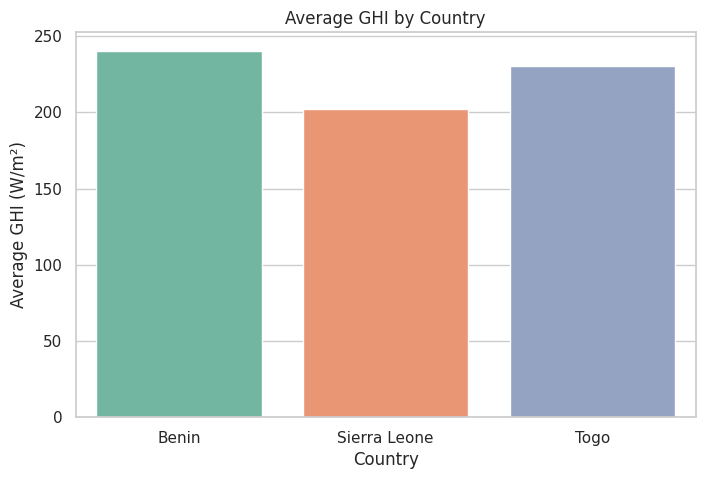

In [20]:
def plot_average_ghi(data):
    """
    Generate a bar chart for average GHI by country.

    Parameters:
    data (DataFrame): A pandas DataFrame containing 'Country' and 'mean_GHI' columns.
    """
    plt.figure(figsize=(8, 5))
    sns.barplot(data=data, x='Country', y='mean_GHI', palette='Set2')
    plt.title('Average GHI by Country')
    plt.ylabel('Average GHI (W/m²)')
    plt.show()

# Extract average GHI from the summary table
avg_ghi = summary_statistics[['Country', 'mean_GHI']]

# Plot the average GHI bar chart
plot_average_ghi(avg_ghi)